In [1]:
def improved_euler(f, a, b, h, y0):
    """改进欧拉法

    用**改进欧拉法**求如下常微分方程初值问题的数值解:

        y'(x) = f(x, y)  (a <= x <= b)
        y(a) = y_0

    This function returns a generator that does lazy calculations，
    which generates solutions (x, y) of the equation for x from a to b by step h.

    Args:

        f: 二元函数，y'(x) = f(x, y)
        a, b: float, x 的区间
        h: float , x 迭代步：x_0 = a，x_1 = x_0 + h, x_2 = x_1 + h, ..., x_n = x_{n-1} + h = b
        y0: float, 初值 y(a)

    Yields:

        (x, y)：方程的解 for x from a to b, step h.
 
    Raises:

        ValueError: (b < a) or (h <= 0)
    """
    if b < a:
        raise ValueError("unexpected range [a, b] where b < a")
    if h <= 0:
        raise ValueError("unexpected step h <= 0")
    
    x = a
    y = y0

    while x <= b or abs(b - x) < 1e-14:    # x <= b
        yield (x, y)

        y_next_g = y + h * f(x, y)
        y_next = y + h * ( f(x, y) + f(x+h, y_next_g) ) / 2
        
        x = x + h
        y = y_next

In [2]:
rs = improved_euler(lambda x, y: y - x**2 + 1, a=0, b=0.5, h=0.1, y0=0.5)
for r in rs:
    print(r[0],r[1], sep='\t')

0	0.5
0.1	0.657
0.2	0.828435
0.30000000000000004	1.013720675
0.4	1.2122113458750001
0.5	1.4231935371918751


In [3]:
def runge_kutta(f, a, b, h, y0):
    """四阶龙格-库塔法的算法: (generally referred to as RK4)

    用经典**四阶龙格-库塔算法**求如下常微分方程初值问题的数值解:

        y'(x) = f(x, y)  (for a <= x <= b)
        y(a) = y_0

    This function returns a generator that does lazy calculations，
    which generates solutions (x, y) of the equation for x from a to b by step h.

    Args:

        f: 二元函数，y'(x) = f(x, y)
        a, b: float, x 的区间
        h: float , x 迭代步：x_0 = a，x_1 = x_0 + h, x_2 = x_1 + h, ..., x_n = x_{n-1} + h = b
        y0: float, 初值 y(a)

    Yields:

        (x, y)：方程的解 for x from a to b, step h.
 
    Raises:

        ValueError: (b < a) or (h <= 0)
    """
    if b < a:
        raise ValueError("unexpected range [a, b] where b < a")
    if h <= 0:
        raise ValueError("unexpected step h <= 0")
    
    x = a
    y = y0

    while x <= b or abs(b - x) < 1e-14:    # x <= b
        yield (x, y)

        k1 = f(x, y)
        k2 = f(x + h / 2, y + h * k1 / 2)
        k3 = f(x + h / 2, y + h * k2 / 2)
        k4 = f(x + h, y + h * k3)
        
        x = x + h
        y = y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

In [4]:
rs = runge_kutta(lambda x, y: y - x**2 + 1, a=0, b=0.5, h=0.1, y0=0.5)
for r in rs:
    print(r[0],r[1], sep='\t')

0	0.5
0.1	0.657414375
0.2	0.8292982759973958
0.30000000000000004	1.0150700584326051
0.4	1.2140869057030108
0.5	1.425638395648218


In [5]:
def runge_kutta_fehlberg(f, a, b, h_min, h_max, y0, eps):
    """Runge-Kutta-Fehlberg 方法（RKF）

    用 **Runge-Kutta-Fehlberg 方法**求如下常微分方程初值问题的数值解:

        y'(x) = f(x, y)  (for a <= x <= b)
        y(a) = y_0

    This function returns a generator that does lazy calculations，
    which generates solutions (x, y) of the equation for x from a to b by step h.

    Args:

        f: 二元函数，y'(x) = f(x, y)
        a, b: float, x 的区间端点
        h_min: float, 最小步长
        h_max: float, 最大步长
        y0: float, 初值 y(a)
        eps: float >= 0，容许误差

    Yields:

        (x, y)：方程的解 for x from a to b, step h.
 
    Raises:

        ValueError: (b > a) or (h_max < h_min) or (eps < 0)
        GeneratorExit: h_min too small. Failed to continue.

    """
    if b < a:
        raise ValueError("unexpected range [a, b] where b < a")
    if h_max < h_min:
        raise ValueError("unexpected step h_max < h_min ")
    if eps < 0:
        raise ValueError("unexpected eps < 0")

    h = h_max

    x = a
    y = y0

    yield (x, y)

    while x <= b:
        k1 = h * f(x, y)
        k2 = h * f(x + h / 4, y + k1 / 4)
        k3 = h * f(x + 3 * h / 8, y + 3 * k1 / 32 + 9 * k2/ 32)
        k4 = h * f(x + 12 * h / 13, y + 1932 / 2197 * k1 - 7200 / 2197 * k2  + 7296 / 2197 * k3 )
        k5 = h * f(x + h, y + 439 / 216 * k1 - 8 * k2 + 3680 / 513 * k3 - 845 / 4104 * k4)
        k6 = h * f(x + h / 2, y - 8 / 27 * k1 + 2 * k2 - 3544 / 2565 * k3 + 1859 / 4104 * k4 - 11 / 40 * k5)

        R = abs(k1 / 360 - 128 / 4275 * k3 - 2197 / 75240 * k4 + k5 / 50 + 2 / 55 * k6)

        if R <= h * eps:
            x = x + h
            y = y + k1 * 25 / 216 + 1408 / 2565 * k3 + 2197 / 4104 * k4 - k5 / 5
            yield (x, y)

        delta = 0.84 * (eps * h / R) ** (1/4)

        if delta <= 0.1:
            h = 0.1 * h
        elif delta >= 4:
            h = 4 * h
        else:
            h = delta * h

        if h > h_max:
            h = h_max

        if abs(x - b) < eps:
            break
        
        if x + h > b:
            h = b - x

        if h < h_min:
            raise GeneratorExit("h_min too small. Failed to continue.")

In [6]:
rs = runge_kutta_fehlberg(lambda x, y: y - x**2 + 1, a=0, b=2, h_min=0.01, h_max=0.5, y0=0.5, eps=1e-6)
for r in rs:
    print(r[0],r[1], sep='\t')

0	0.5
0.13654362227564565	0.7185790374592727
0.26801219081330985	0.954173517401745
0.4012266303587918	1.2166084183124863
0.5366174380061863	1.5060873731856972
0.6747628968898941	1.823047493996752
0.8164946373311293	2.1683758740655024
0.9630852685641695	2.5438210903808947
1.116667783480386	2.952954119903974
1.2813817240537375	3.4038972431729375
1.467877999563017	3.9204151719053937
1.662648091115601	4.453068120471034
1.8154680775168273	4.854886481689374
1.967706858383927	5.230159855113913
2.0	5.30547384382613


## 题目

解题的类：

In [7]:
import matplotlib.pyplot as plt

class Question(object):
    def __init__(self, f, a, b, h, y0, h_min, h_max, eps, actual_solution):
        super().__init__()

        self.f = f
        self.a = a
        self.b = b
        self.h = h
        self.actual_solution = actual_solution

        self.args_rk = [f, a, b, h, y0]
        self.args_rkf = [f, a, b, h_min, h_max, y0, eps]

        self.results = {}

    def __do_rk(self, method):
        # print(method.__name__, '\n' + '-' * 25)

        rs = method(*self.args_rk)

        self.results[method.__name__] = list(rs)
        for r in self.results[method.__name__]:
            print(r[0],r[1], sep='\t')

    def __do_rkf(self, method):
        # print(method.__name__, '\n' + '-' * 25)

        rs = method(*self.args_rkf)

        self.results[method.__name__] = list(rs)
        for r in self.results[method.__name__]:
            print(r[0],r[1], sep='\t')

    def __plot(self):
        # 真解
        xs = [self.a + k * (self.b - self.a) / 100 for k in range(101)]
        ys = [actual_solution(x) for x in xs]
        plt.plot(xs, ys, 'r-', linewidth=3, label='actual_solution')

        # 各种数值解
        styles = (s for s in ['bo-', 'ys-', 'g^-'])
        for k in self.results:
            xs, ys = list(zip(*self.results[k]))
            plt.plot(xs, ys, next(styles), label=k)

        plt.legend()

    def solve(self):
        print('\nImproved Euler：')
        self.__do_rk(improved_euler)
        print('\nRK4：')
        self.__do_rk(runge_kutta)
        print('\nRKF：')
        self.__do_rkf(runge_kutta_fehlberg)
        
        # 绘制整体
        self.__plot()
        plt.show()

        # 绘制一个局部
        self.__plot()
        plt.xlim(self.b - self.h, self.b)
        y1, y2 = self.actual_solution(self.b - self.h), self.actual_solution(self.b)
        plt.ylim(min(y1, y2), max(y1, y2))
        plt.legend()
        plt.show()

1. a).

$$
\begin{cases}
\frac{dy}{dx}=y^2\\
y(0) = 1
\end{cases}
\quad 0.1\le x \le 0.4
\quad h=0.1
$$


Improved Euler：
0	1
0.1	1.1105
0.2	1.2482762285866027
0.30000000000000004	1.4247601260213614
0.4	1.6587363946557603

RK4：
0	1
0.1	1.1111104900521944
0.2	1.2499979920470152
0.30000000000000004	1.4285661863014445
0.4	1.6666532572503225

RKF：
0	1
0.025039979795246234	1.0256830838146338
0.05023788001716733	1.052895224207251
0.07449021044767089	1.080485600141923
0.09781031904296066	1.1084143630136087
0.12024490661926406	1.1366799785401573
0.1418387901059162	1.1652822211726135
0.16263399033424697	1.194220913397017
0.1826699094328344	1.2234958832046705
0.20198352501286038	1.253106962683577
0.22060956834055725	1.2830539876206315
0.23858068763984974	1.3133367976484365
0.2559275973202766	1.3439552358985725
0.27267921507337145	1.3749091491644632
0.2888627873258841	1.4061983873896555
0.3045040049273295	1.4378228039555951
0.31962710915217313	1.4697822551801247
0.33425498973396817	1.5020766007259563
0.3484092747167351	1.5347057029264364
0.3621104137928546	1.5676694270969493
0.37537775507854887	1.60

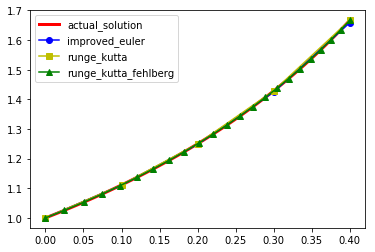

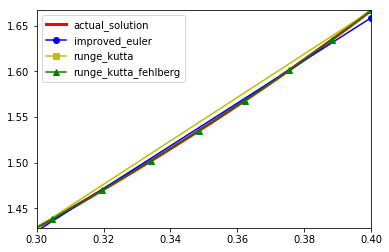

In [8]:
def f(x, y):
    return y ** 2

a, b = 0, 0.4
h = 0.1
y0 = 1
h_min=0.001
h_max=0.5
eps=1e-8

def actual_solution(x):
    return 1 / (1 - x)

#  def __init__(self, f, a, b, h, y0, h_min, h_max, eps, actual_solution):
q1 = Question(f, a, b, h, y0, h_min, h_max, eps, actual_solution)
q1.solve()

1. b)

$$
\begin{cases}
\frac{dy}{dx}=x/y\\
y(2.0) = 1
\end{cases}
\quad 2.0\le x \le 2.6
\quad h=0.1
$$


Improved Euler：
2.0	1
2.1	1.1875
2.2	1.3565459923557568
2.3000000000000003	1.5133558178802287
2.4000000000000004	1.6614034116615422
2.5000000000000004	1.802850617838112
2.6000000000000005	1.9391431095639506

RK4：
2.0	1
2.1	1.1874362471788942
2.2	1.3564683099780293
2.3000000000000003	1.513276851413264
2.4000000000000004	1.6613269035807452
2.5000000000000004	1.8027776370912958
2.6000000000000005	1.9390738201189597

RKF：
2.0	1
2.0211724308032437	1.0416995703232401
2.0415542156639184	1.080714400351875
2.063772665098076	1.1221219241586564
2.0878610104513116	1.16583171952646
2.1140161190991194	1.212049566189454
2.142450034889673	1.2609885609556355
2.173401878648306	1.3128883138785854
2.2071414713667057	1.3680180820976793
2.243974231145123	1.4266815860724658
2.2842469848065763	1.4892227117613641
2.3283549439053477	1.5560323717778588
2.3767501221468326	1.6275568008106627
2.429951552025518	1.7043076428256803
2.488557762018454	1.7868742906237765
2.553262116784645	1.875939080006759
2.6	1.9390719

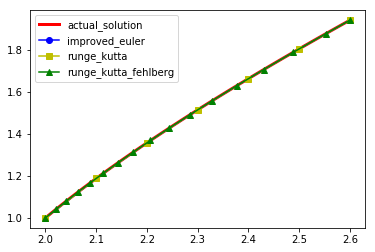

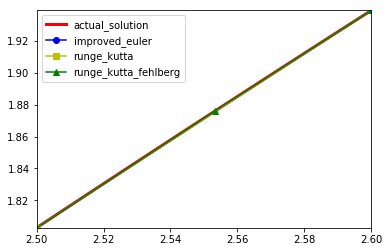

In [9]:
def f(x, y):
    return x / y

a, b = 2.0, 2.6
h = 0.1
y0 = 1
h_min=0.001
h_max=0.5
eps=1e-8

def actual_solution(x):
    return (x**2 - 3) ** (1/2)

#  def __init__(self, f, a, b, h, y0, h_min, h_max, eps, actual_solution):
q2 = Question(f, a, b, h, y0, h_min, h_max, eps, actual_solution)
q2.solve()